Put-Call Ratios for the 10 nearest expiration dates:
Date: 2025-12-26, Put-Call Ratio: 0.73
Date: 2025-12-29, Put-Call Ratio: 0.64
Date: 2025-12-30, Put-Call Ratio: 1.82
Date: 2025-12-31, Put-Call Ratio: 0.42
Date: 2026-01-02, Put-Call Ratio: 0.82
Date: 2026-01-09, Put-Call Ratio: 1.70
Date: 2026-01-16, Put-Call Ratio: 2.21
Date: 2026-01-23, Put-Call Ratio: 1.66
Date: 2026-01-30, Put-Call Ratio: 1.95
Date: 2026-02-20, Put-Call Ratio: 2.95


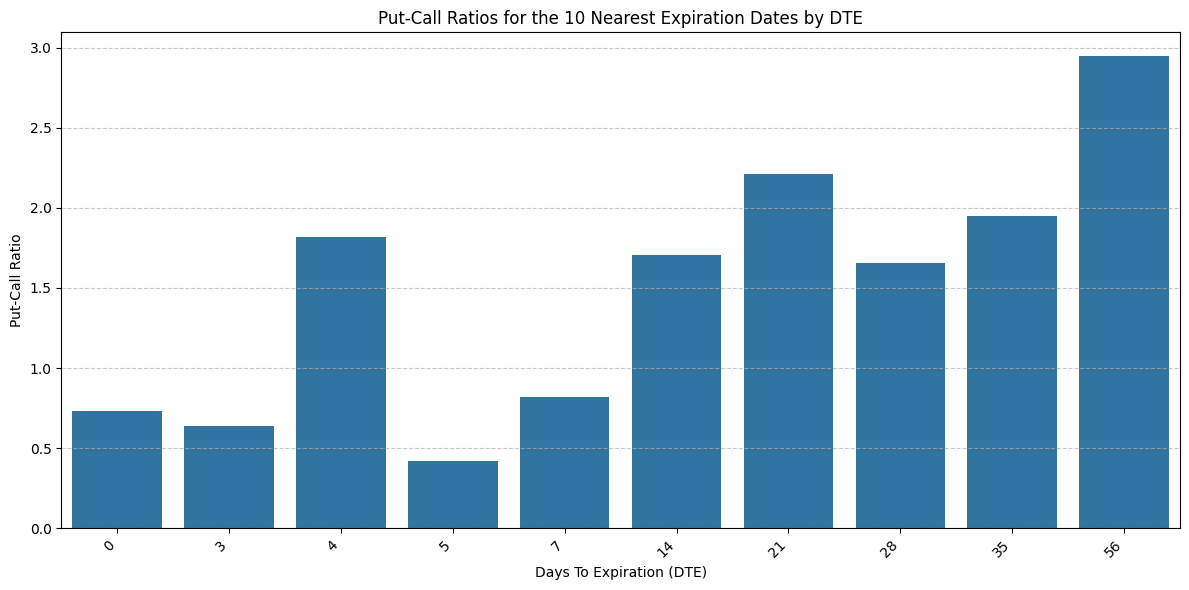

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Define ticker and timeframe
  # find option chains in the 10 nearest expiration dates
  # reserve dictionary for Put/Call ratio across different chains
sp500 = yf.Ticker('SPY')
option_dates = sp500.options
ten_nearest_dates = option_dates[:10]
put_call_ratios_by_date = {}

# Loop to find Put/Call ratio across all chains
  # obtain call and put volume of each expiration
  # calculate Put/Call ratio by dividing volume of Puts by Calls
for date in ten_nearest_dates:
    opt_chain_by_date = sp500.option_chain(date=date)

    calls_by_date = opt_chain_by_date.calls
    puts_by_date = opt_chain_by_date.puts

    total_call_volume_by_date = calls_by_date['volume'].sum()
    total_put_volume_by_date = puts_by_date['volume'].sum()

    if total_call_volume_by_date > 0:
        ratio = total_put_volume_by_date / total_call_volume_by_date
    else:
        ratio = float('nan')

    put_call_ratios_by_date[date] = ratio

print("Put-Call Ratios for the 10 nearest expiration dates:")
for date, ratio in put_call_ratios_by_date.items():
    print(f"Date: {date}, Put-Call Ratio: {ratio:.2f}")

# Convert the dictionary to a DataFrame
put_call_df = pd.DataFrame(put_call_ratios_by_date.items(), columns=['Expiration Date', 'Put-Call Ratio'])

# Sort DF by date
put_call_df['Expiration Date'] = pd.to_datetime(put_call_df['Expiration Date'])
put_call_df = put_call_df.sort_values(by='Expiration Date').reset_index(drop=True)

# Convert dates to days to expiration (DTE)
current_date_ts = pd.Timestamp(datetime.now().date())
put_call_df['DTE'] = (put_call_df['Expiration Date'] - current_date_ts).dt.days

# Generate bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='DTE', y='Put-Call Ratio', data=put_call_df)

# Add title and labels
plt.title('Put-Call Ratios for the 10 Nearest Expiration Dates by DTE')
plt.xlabel('Days To Expiration (DTE)')
plt.ylabel('Put-Call Ratio')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()